In [ ]:
%matplotlib inline

# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from ml.model import models
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

d = load_boston()
X = pd.DataFrame(d.data, columns=d.feature_names)#.apply(lambda x: StandardScaler().fit_transform(x))
y = pd.Series(StandardScaler().fit_transform(d.target))

In [ ]:
X.describe()

In [ ]:
import imp
from ml.model import common
imp.reload(models)
imp.reload(common)

In [98]:
from sklearn.grid_search import ParameterGrid
p = ParameterGrid({'c': [1,2,3], 'x': ['z', 'e']})
len(p)

6

In [100]:
GridSearchCV(SVR(), p.param_grid)

GridSearchCV(backend='multiprocessing', cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid=[{'c': [1, 2, 3], 'x': ['z', 'e']}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [90]:
svr_lin = {'kernel': ['linear'],'C': np.logspace(-3, -1, 8)}
svr_rbf = {'kernel': ['rbf'], 'C': np.logspace(2, 6, 8), 'gamma': np.logspace(-6, -1, 8), 'degree': [1]}
svr_pol = {'kernel': ['poly'], 'C': np.logspace(-8, 8, 8), 'gamma': np.logspace(-8, 8, 8), 'degree': [3]}
svr_est = SVR(verbose=-1, max_iter=1E6)

def pipeline(est):
    return Pipeline([('scale', StandardScaler()), ('est', est)])
clfs = {
#    'svr_lin': pipeline(GridSearchCV(svr_est, svr_lin, cv=3)),
    'svr_rbf': pipeline(GridSearchCV(svr_est, svr_rbf, cv=3)),
#    'svr_pol': pipeline(GridSearchCV(svr_est, svr_pol, cv=3)),
    'gbr': GradientBoostingRegressor()
}

from sklearn.cross_validation import KFold
cv = KFold(len(y), 5, shuffle=True)
res = models.run_regressors(X, y, clfs, cv, par_n_jobs=-1)

Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


INFO:ml.model.log:CV Complete (2 model(s) run)
INFO:ml.model.log:Running model svr_rbf (Pipeline) on fold 1
INFO:ml.model.log:Running model svr_rbf (Pipeline) on fold 2
INFO:ml.model.log:Running model svr_rbf (Pipeline) on fold 3
INFO:ml.model.log:Running model svr_rbf (Pipeline) on fold 4
INFO:ml.model.log:Running model svr_rbf (Pipeline) on fold 5
/Users/eczech/anaconda/envs/research3.4/lib/python3.4/site-packages/sklearn/svm/base.py:209: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eczech/anaconda/envs/research3.4/lib/python3.4/site-packages/sklearn/svm/base.py:209: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eczech/anaconda/envs/research3.4/lib/python3.4/site-packages/sklearn/svm/base.py:209: ConvergenceWarning:

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
from ml.model import summaries as ml_precis
from ml.model import importances
imp.reload(ml_precis)
imp.reload(importances)
imp.reload(models)

In [92]:
ml_precis.summarize_grid_parameters(res)

model_name  variable                        
svr_rbf     C         71968.56730011514         2
                      1389.4954943731375        2
                      1000000.0                 1
            degree    1                         5
            gamma     0.0007196856730011522     2
                      0.00013894954943731373    2
                      2.6826957952797274e-05    1
            kernel    rbf                       5
dtype: int64

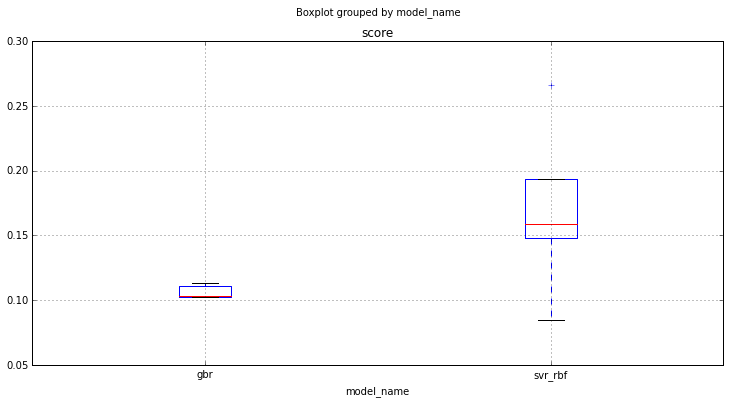

In [93]:
ml_precis.plot_model_scores(res)

In [ ]:
ml_precis.plot_feature_importance(res)

In [ ]:
feat_imp

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
clf = Pipeline([('scale', StandardScaler()), ('est', GradientBoostingRegressor())])
clf.named_steps